In [14]:
import json

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

print plt.style.available
plt.style.use('ggplot')

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


/Users/luuk/pyEnv/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# --------------------------------------------- #
def fnShowNumberOfReviews(MOVIES):
    s = 0
    for m in MOVIES:
        if 'reviews' in m:
            # print m['name'], len(m['reviews'])
            s += len(m['reviews'])
        else:
            continue

    return s
    # --------------------------------------------- #

In [3]:
MOVIES = json.load(open('../../data-blog---list_of_movies_v3-v1313.json','r'))

print 'We have {} movies in the dataset.'.format(len(MOVIES))
print '\nNumber of reviews available: {}'.format(fnShowNumberOfReviews(MOVIES))

We have 9869 movies in the dataset.

Number of reviews available: 648988


In [4]:
print MOVIES[0].keys()

[u'poster_desc', u'reviews', u'description', u'avg_rating', u'year', u'poster_img', u'director', u'link', u'stars', u'num_votes', u'genre', u'runtime', u'num_reviews_pages', u'name']


In [5]:
REVIEWS = []

for movie in MOVIES:
    if 'reviews' in movie:
        reviews_tmp = []
        for r in movie['reviews']:
            r['movie'] = movie['name']
            r['link'] = movie['link']
            r['avg_rating'] = movie['avg_rating']            
            r['num_votes'] = movie['num_votes']
            reviews_tmp.append(r)
        REVIEWS += reviews_tmp
    else:
        continue

print json.dumps(REVIEWS[3],indent=4)

{
    "movie": "Pulp Fiction", 
    "avg_rating": "8.9", 
    "review_content": "\nPulp Fiction may be the single best film ever made, and quite\nappropriately it is by one of the most creative directors of all time,\nQuentin Tarantino. This movie is amazing from the beginning definition\nof pulp to the end credits and boasts one of the best casts ever\nassembled with the likes of Bruce Willis, Samuel L. Jackson, John\nTravolta, Uma Thurman, Harvey Keitel, Tim Roth and Christopher Walken.\nThe dialog is surprisingly humorous for this type of film, and I think\nthat's what has made it so successful. Wrongfully denied the many\nOscars it was nominated for, Pulp Fiction is by far the best film of\nthe 90s and no Tarantino film has surpassed the quality of this movie\n(although Kill Bill came close). As far as I'm concerned this is the\ntop film of all-time and definitely deserves a watch if you haven't\nseen it.\n", 
    "review_rating": 10, 
    "review_title": "Unbelievable.", 
    "lin

In [6]:
data = pd.DataFrame(REVIEWS)

print data.head(2), data.shape

  avg_rating               link         movie  num_votes  \
0        8.9  /title/tt0110912/  Pulp Fiction  1,235,868   
1        8.9  /title/tt0110912/  Pulp Fiction  1,235,868   

                                      review_content  review_rating  \
0  \nOne of the early scenes in "Pulp Fiction" fe...             10   
1  \nTo put this in context, I am 34 years old an...             10   

                        review_title         user_href  \
0  The masterpiece without a message  /user/ur0556667/   
1                    Simply The Best  /user/ur1515595/   

                   user_name  
0  kylopod (kylopod@aol.com)  
1                  wolvesrug   (648988, 9)


In [7]:
data.avg_rating = data.avg_rating.astype(float)
data.review_rating = data.review_rating.astype(float)

In [8]:
# Lets not hold massive objects in memory.
MOVIES = REVIEWS = None

---
### Visualisations

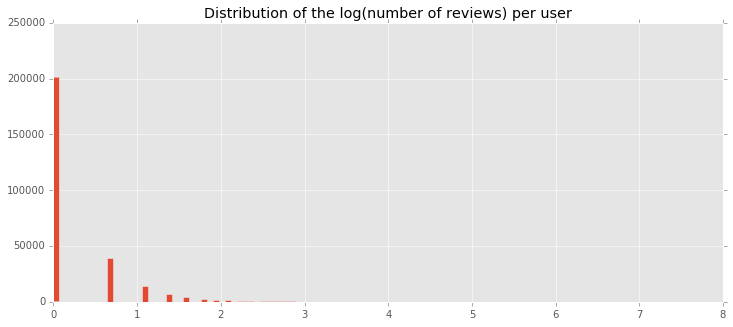

In [10]:
data.user_href.value_counts().apply(lambda c: np.log(c)).hist(bins=100, figsize=(12,5))
plt.title("Distribution of the log(number of reviews) per user")
pass

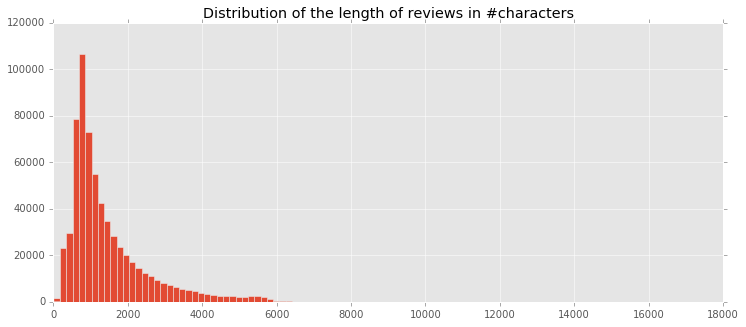

In [11]:
data['review_length'] = data.review_content.apply(lambda s: len(s))
data.review_length.hist(bins=100, figsize=(12,5))
plt.title("Distribution of the length of reviews in #characters")
pass

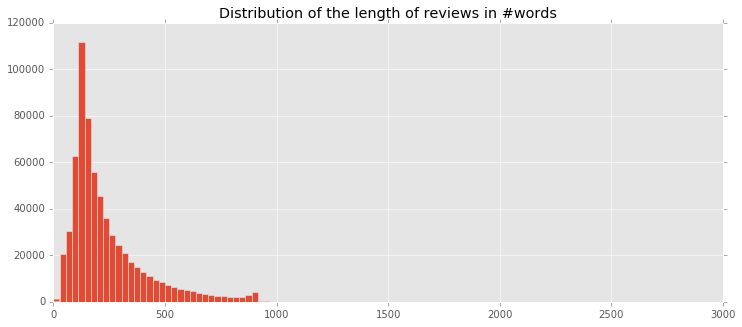

In [12]:
data['review_length'] = data.review_content.apply(lambda s: len(s.split(' ')))
data.review_length.hist(bins=100, figsize=(12,5))
plt.title("Distribution of the length of reviews in #words")
pass

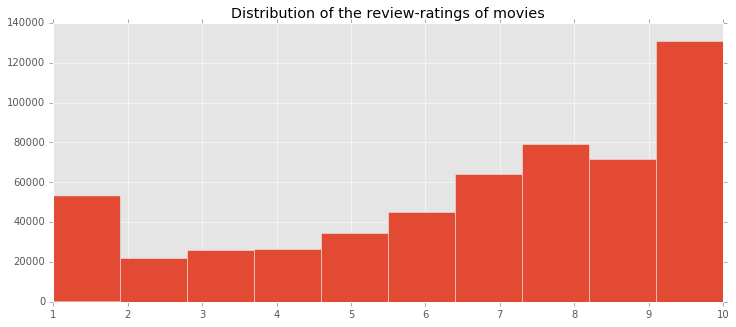

In [13]:
data.review_rating.hist(bins=10, figsize=(12,5))
plt.title("Distribution of the review-ratings of movies")
plt.xlim([1,10])
pass

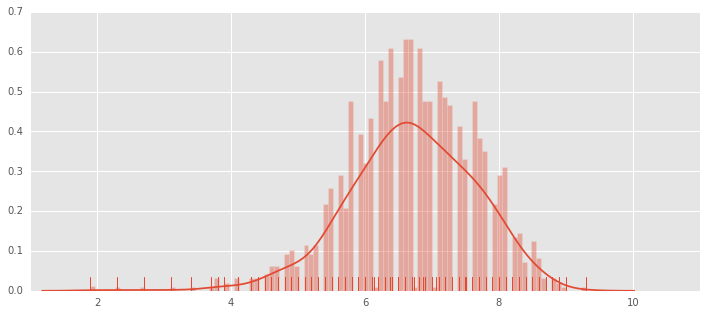

In [15]:
# data.groupby('movie').avg_rating.mean().hist(bins=100, figsize=(12,5))
# plt.title("Distribution of the overall movie-rating")
# pass

plt.figure(figsize=(12,5))
sns.distplot(data.groupby('movie').avg_rating.mean().values, bins=100, kde=True, rug=True)
plt.title("Distribution of the overall movie-rating")
pass

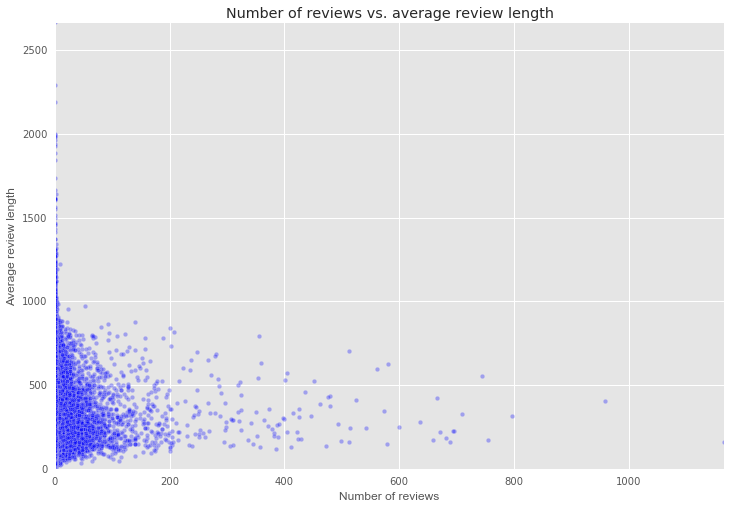

In [16]:
data_pivot = pd.pivot_table(data, values='review_length', index=['user_href'], columns=[], aggfunc=[len,np.mean])

plt.figure(figsize=(12,8))
plt.scatter(data_pivot['len'].values, data_pivot['mean'].values, alpha=0.3)
plt.xlim([0,data_pivot['len'].max()])
plt.xlabel('Number of reviews')
plt.ylim([0,data_pivot['mean'].max()])
plt.ylabel('Average review length')
plt.title('Number of reviews vs. average review length')
pass

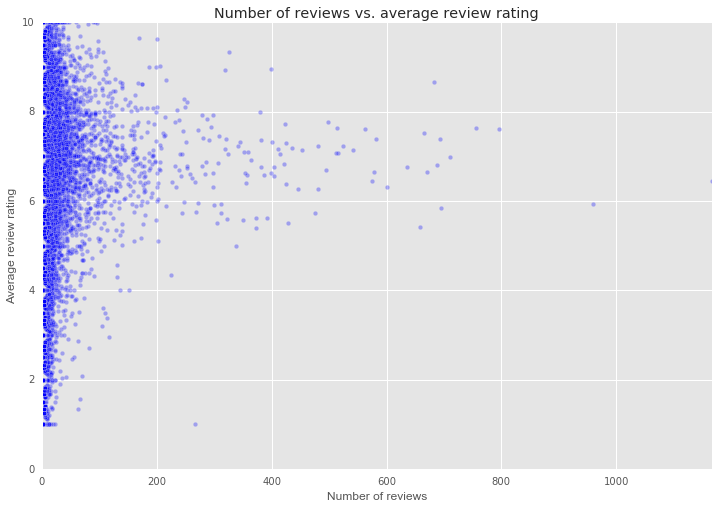

In [17]:
data_pivot = pd.pivot_table(data, values='review_rating', index=['user_href'], columns=[], aggfunc=[len,np.mean])

plt.figure(figsize=(12,8))
plt.scatter(data_pivot['len'].values, data_pivot['mean'].values, alpha=0.3)
plt.xlim([0,data_pivot['len'].max()])
plt.xlabel('Number of reviews')
plt.ylim([0,data_pivot['mean'].max()])
plt.ylabel('Average review rating')
plt.title('Number of reviews vs. average review rating')
pass

In [18]:
user_counts = pd.DataFrame(data.user_href.value_counts())
user_counts.rename(columns={'user_href': 'user_num_reviews_global'}, inplace=True)

data = data.merge(user_counts, how='outer', left_on='user_href', right_index=True)

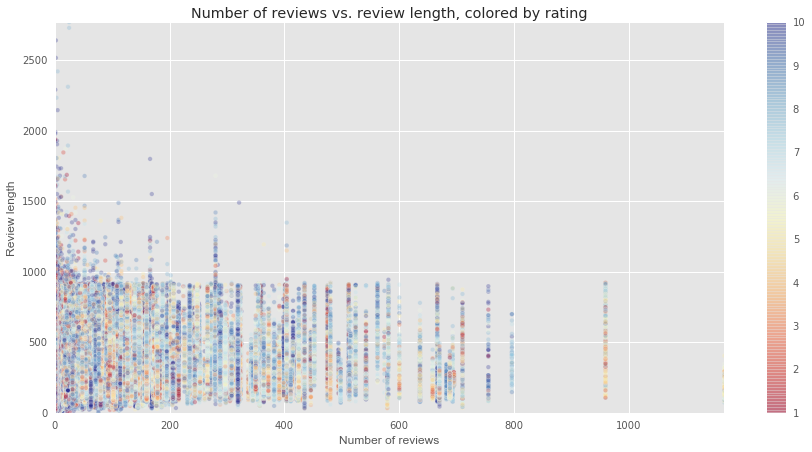

In [19]:
cm = plt.cm.get_cmap('RdYlBu')

plt.figure(figsize=(15,7))
sc = plt.scatter(
    data.user_num_reviews_global.values, 
    data.review_length.values,
    c=data.review_rating.values,
    alpha=0.3, cmap=cm
)
plt.colorbar(sc)
plt.xlim([0,data.user_num_reviews_global.max()])
plt.xlabel('Number of reviews')
plt.ylim([0,data.review_length.max()])
plt.ylabel('Review length')
plt.title('Number of reviews vs. review length, colored by rating')
pass

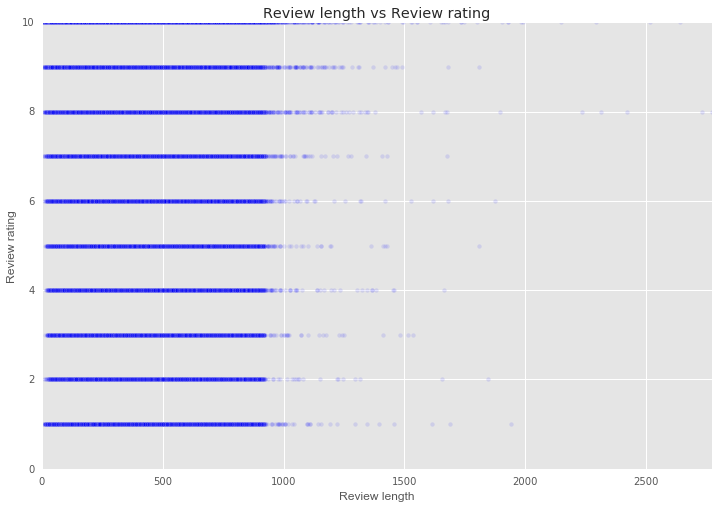

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(data.review_length.values, data.review_rating.values, alpha=0.1)
plt.xlim([0,data.review_length.max()])
plt.xlabel('Review length')
plt.ylim([0,data.review_rating.max()])
plt.ylabel('Review rating')
plt.title('Review length vs Review rating')
pass

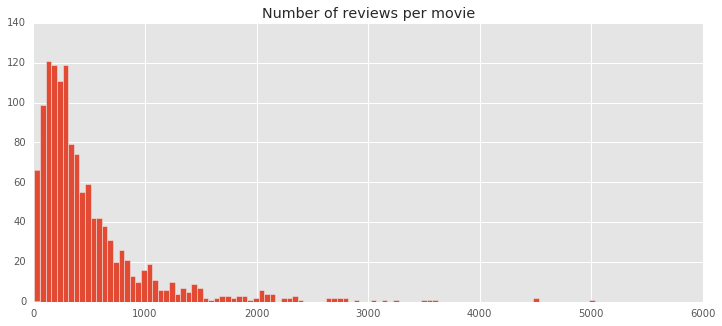

In [21]:
data_pivot = pd.pivot_table(data, values='review_rating', index=['movie'], columns=[], aggfunc=[len,np.mean])

data_pivot['len'].hist(bins=100, figsize=(12,5))
plt.title('Number of reviews per movie')
pass

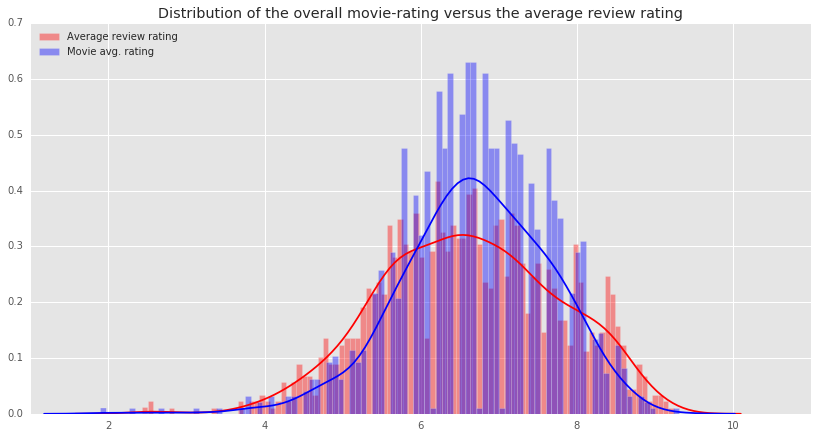

In [29]:
# # Keep in mind, these are only ratings from reviews!
# data_pivot['mean'].hist(bins=100, figsize=(12,5))
# plt.title('Distribution of average movie review ratings')
# pass

plt.figure(figsize=(14,7))
sns.distplot(data_pivot['mean'].values, bins=100, kde=True, color='r', label='Average review rating')
sns.distplot(data.groupby('movie').avg_rating.mean().values, bins=100, kde=True, color='b', label='Movie avg. rating')
plt.title("Distribution of the overall movie-rating versus the average review rating")
plt.legend(loc='upper left')
pass